<a href="https://colab.research.google.com/github/dalexa10/Numerical_Methods_PDEs/blob/main/Lecture_2/advection-1d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**28  # Don't worry this is just a hack to set the size of the animation
from matplotlib import animation
from IPython.display import HTML


#### Problem description

Here you will set up the problem for
$$ u_t + c u_x = 0$$
with periodic BC on the interval [0,1]

In [2]:
c = 1.0
T = 1.0 / c # end time

#### Set up the grid

`hx` is the grid spacing in the `x`-direction

`x` are the grid coordinates

`xx` are really fine grid coordinates

In [36]:
nx = 50
x = np.linspace(0, 1, nx, endpoint=False)
hx = x[1] - x[0]
xx = np.linspace(0, 1, 1000, endpoint=False)
print(hx)

0.02


Now define an initial condition

In [37]:
def f(x):
    u = np.zeros(x.shape)
    #u[(x>0.4) & (x<0.6)] = 1.0  # Just another form to filter a numpy array
    u[np.intersect1d(np.where(x>0.4), np.where(x<0.6))] = 1.0
    return u

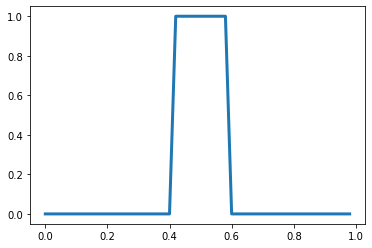

In [38]:
plt.plot(x, f(x), lw=3, clip_on=False)

#### Setting time step $h_t$

Now we need a time step.  Let
$$ h_t = h_x \frac{\lambda}{c}$$

So we need a parameter $\lambda$

Dario Note: Also consider that lambda is a sort of sensibility parameter that determines when a solution converges or blows up. In heat transfer, this is known as the Fourier number, which is sort of related to stability

<span style="color:red">What happens when $\lambda>1.0$?</span>

<span style="color:red">When the `method` changes to FTCS, what is the impact of $\lambda$?</span>

In [39]:
lmbda = 0.93
ht = hx * lmbda / c
nt = int(T/ht)
print(f'     T = {T}')
print(f'tsteps = {nt}')
print(f'    hx = {hx}')
print(f'    ht = {ht}')
print(f'lambda = {lmbda}')

     T = 1.0
tsteps = 53
    hx = 0.02
    ht = 0.018600000000000002
lambda = 0.93


Now make an index list, called $J$, so that we can access $J+1$ and $J-1$ easily

In [43]:
J = np.arange(0, nx - 1)  # all vertices
Jm1 = np.roll(J, 1)
Jp1 = np.roll(J, -1)

print(J)
print(Jm1)
print(Jp1)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
[48  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
  0]


# Run and Animate

In [44]:
import time

method = 'ETBS'

u = f(x)

fig, ax = plt.subplots()
ax.set_title('u vs x')
line1, = ax.plot(x, u, lw=3, clip_on=False)
line2, = ax.plot(x, u, lw=3, clip_on=False)

        
def timestepper(n):
    
    if method == 'ETBS':
        u[J] = u[J] - lmbda * (u[J] - u[Jm1])
            
    if method == 'ETFS':
        u[J] = u[J] - lmbda * (u[Jp1] - u[J])
        
    if method == 'ETCS':
        u[J] = u[J] - lmbda * (1.0 / 2.0) * (u[Jp1] - u[Jm1])
    
    # exact solution
    uexact = f((xx - c * (n+1) * ht) % 1.0)
        
    line1.set_data(xx, uexact)
    line2.set_data(x, u)
    
    return line1, line2

ani = animation.FuncAnimation(fig, timestepper, frames=nt, interval=30,
                              blit=True)
html = HTML(ani.to_jshtml())
plt.clf()
html

<Figure size 432x288 with 0 Axes>

#### Check the error

In [45]:
uex = f((x - c * (nt+1) * ht) % 1.0)
error = u - uex
l2err = np.sqrt(hx * np.sum(error**2))
print(l2err)

0.20728724544462046
